In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy.stats import iqr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fish_dataset.xlsx to Fish_dataset.xlsx


In [ ]:
!pip install -q xlrd
#import pandas as pd
df1 = pd.read_excel('Fish_dataset.xlsx')
df1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


### 1. Plot a bar chart showing count of individual species?

In [ ]:
df1['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

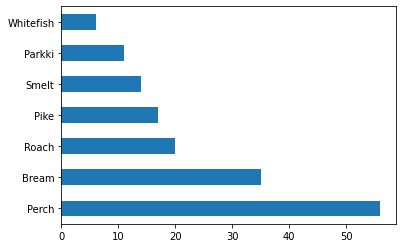

In [ ]:
df1['Species'].value_counts().plot(kind='barh')

### 2. Identify outliers and remove if any?

In [ ]:
df1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


**Prints the IQR values**

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Weight     530.00000
Length1     13.65000
Length2     14.50000
Length3     16.50000
Height       6.42110
Width        2.19885
dtype: float64


**'True' and 'False' values. 'True' represents the presence of the outlier.**

In [ ]:
print("\n'True' and 'False' values. 'True' represents the presence of the outlier.\n")
print(((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))))

print("\nThis is the sum of Outliers in each col\n")
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()


'True' and 'False' values. 'True' represents the presence of the outlier.

     Height  Length1  Length2  Length3  Species  Weight  Width
0     False    False    False    False    False   False  False
1     False    False    False    False    False   False  False
2     False    False    False    False    False   False  False
3     False    False    False    False    False   False  False
4     False    False    False    False    False   False  False
..      ...      ...      ...      ...      ...     ...    ...
154   False    False    False    False    False   False  False
155   False    False    False    False    False   False  False
156   False    False    False    False    False   False  False
157   False    False    False    False    False   False  False
158   False    False    False    False    False   False  False

[159 rows x 7 columns]

This is the sum of Outliers in each col



Height     0
Length1    3
Length2    3
Length3    1
Species    0
Weight     3
Width      0
dtype: int64

**This is data without Outliers**

In [ ]:
df1 = pd.read_excel('Fish_dataset.xlsx')
df1['z_score']=stats.zscore(df1['Weight'])
df1.loc[df1['z_score'].abs()<=3]
df1.describe()

,Weight,Length1,Length2,Length3,Height,Width,z_score
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,1.590000e+02
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486,4.329172e-17
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,1.003160e+00
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,-1.116227e+00
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,-7.799517e-01
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,-3.512011e-01
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,7.052627e-01
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,3.507554e+00


**These are the removed rows**

In [ ]:
Removed_rows=df1.loc[df1['z_score'].abs()>3]
Removed_rows

,Species,Weight,Length1,Length2,Length3,Height,Width,z_score
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144,3.367440
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144,3.227325
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480,3.507554


### 3. Build a regression model and print regression equation?

Coefficients
0.025570985481237284 16.061570834150096
Length1
19.922789641816927


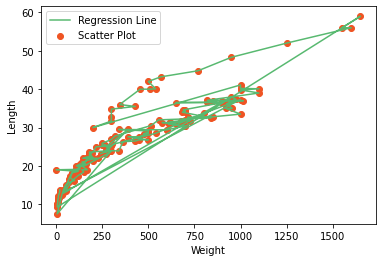

Equation
y=MX+B
Y=0.025570985481237284 X+16.061570834150096


In [ ]:
X = df1['Weight']
Y = df1['Length1']
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2 b1=m, b0=c
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print("Coefficients")
print(b1, b0)

# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1)
y = b0 + b1 * 151 #151 is wt. for which we predict Length1
print("Length1")
print(y)

# Ploting Line
plt.plot(X, Y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot') # orignal code had small x,y 

plt.xlabel('Weight')
plt.ylabel('Length')
plt.legend()
plt.show()
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
#print("RMSE")
#print(rmse)

# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
#print("R2 Score")
#print(r2)
print("Equation")
print("y=MX+B")
print("Y={} X+{}".format(b1,b0))


### 4. What is the mean score of the model at  95% confidence interval?

In [ ]:
import statsmodels.stats.api as sms
import numpy as np,scipy.stats as st
from numpy import mean
st.t.interval(0.95,(df1.Length1)-1,loc=np.mean(df1.Length1),scale=st.sem(df1.Length1))
m=mean(df1)
print(m)

Weight     3.983264e+02
Length1    2.624717e+01
Length2    2.841572e+01
Length3    3.122704e+01
Height     8.970994e+00
Width      4.417486e+00
z_score    4.329172e-17
dtype: float64


### 5. Compare real and predicted weights and give a conclusion statement based on it?

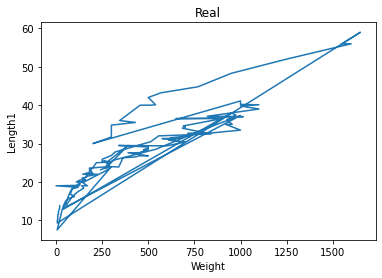

Length1
19.922789641816927


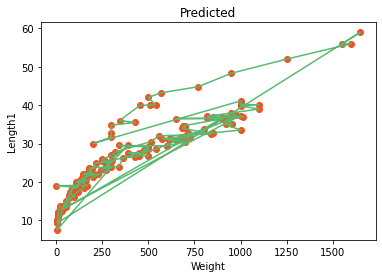

In [ ]:
import matplotlib.pyplot as plt 
x =df1['Weight'] 
y =df1['Length1']  
plt.plot(x, y)   
plt.xlabel('Weight') 
plt.ylabel('Length1') 
plt.title('Real')
plt.show()
#################################################
X = df1['Weight']
Y = df1['Length1']
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2 b1=m,b0=c
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1)
y = b0 + b1 * 151 #151 is wt. for which we predict Length1
print("Length1")
print(y)

# Ploting Line
plt.plot(X, Y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot') # orignal code had small x,y 

plt.xlabel('Weight')
plt.ylabel('Length1')
plt.title('Predicted')
plt.show()
